In [1]:
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats
import pandas as pd
from sklearn import preprocessing

In [2]:
merged_df = pd.read_csv('swift_data.csv', sep='\t')

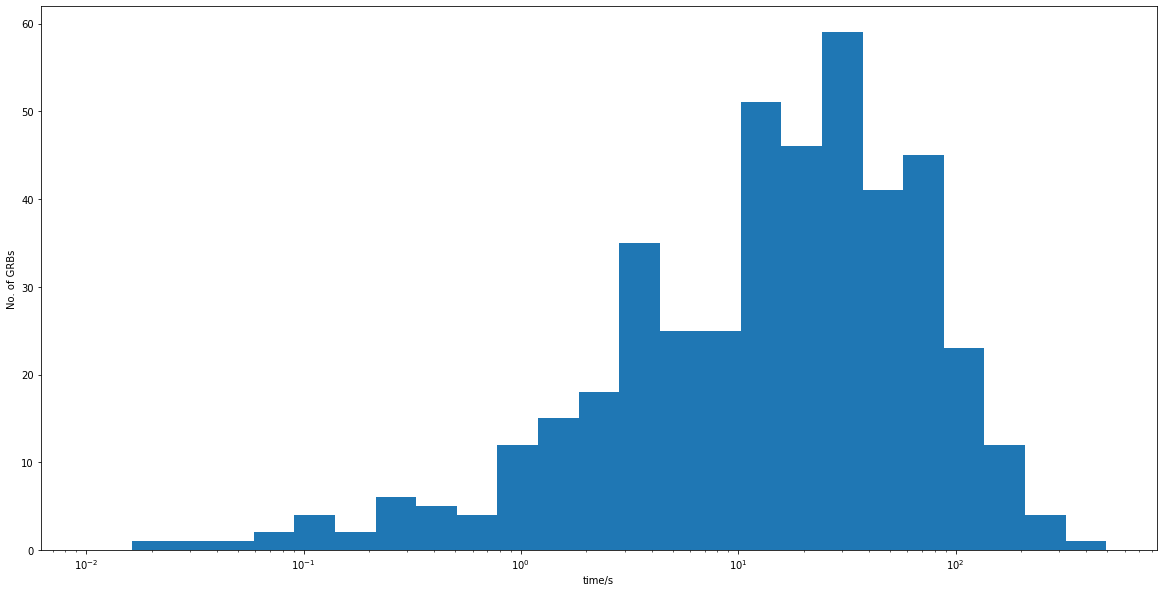

In [3]:
# credit to user Rahul Shaw on stackoverflow for the following function
# Makes Log Restframe T90 distribution with distributed bins. Bins numbers are defined by me, i.e not auto.
# we note that due to the limited number of SGRBs with redshift data, it is hard to see the that the data are bimodal

plt.figure(figsize=(20,10)) #sets figure size
plt.xlabel('time/s')
plt.ylabel('No. of GRBs')

def plot_loghist(x, bins):
    hist, bins = np.histogram(x, bins=bins)
    logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
    plt.hist(x, bins=logbins)
    plt.xscale('log')

plot_loghist(merged_df['Restframe T90'], 25)

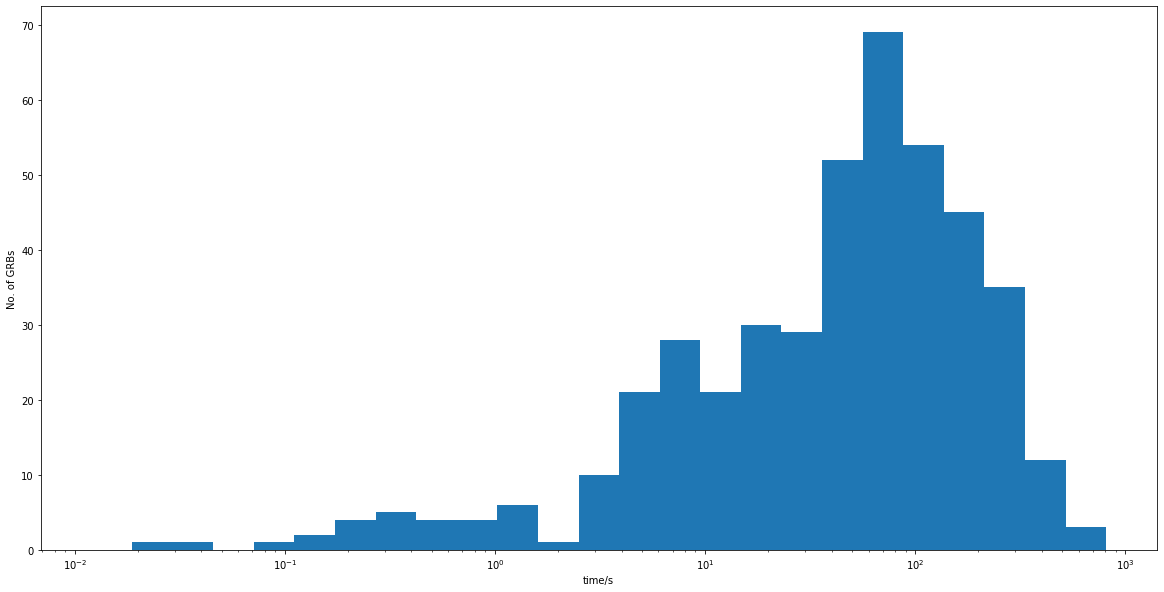

In [4]:
plt.figure(figsize=(20,10)) #sets figure size
plt.xlabel('time/s')
plt.ylabel('No. of GRBs')

def plot_loghist(x, bins):
    hist, bins = np.histogram(x, bins=bins)
    logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
    plt.hist(x, bins=logbins)
    plt.xscale('log')

plot_loghist(merged_df['T90'], 25)


In [5]:
#making normalised distributions for LGRBs and SGRBs through the full range of redshifts 
LGRBs = merged_df.loc[(merged_df['T90'] >= 2)]
SGRBs =  merged_df.loc[(merged_df['T90'] < 2)]

In [6]:
# for LGRBs normalisation
x = LGRBs[['z']].values.astype(float)
#for SGRBS normalisation
i = SGRBs[['z']].values.astype(float)

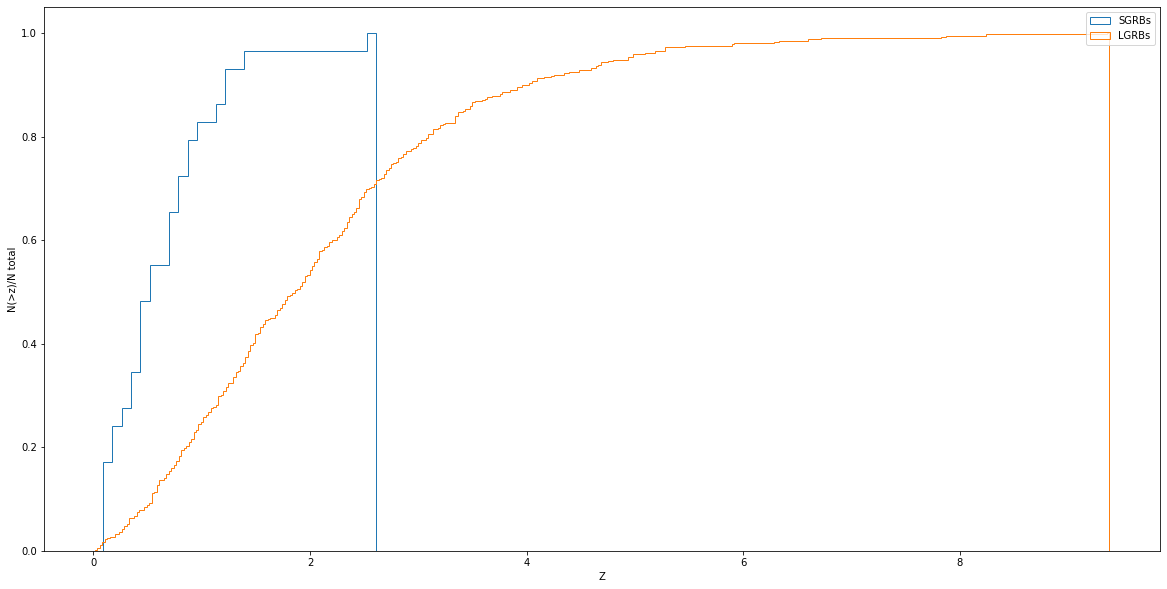

In [7]:
plt.figure(figsize=(20,10)) #sets figure size
# by plotting the reverse of a normalised cumulative distribution, we get the normalised cumulative distribution for z
n, bins, patches = plt.hist(i, len(i), density=True, histtype='step',
                           cumulative=True, label='Empirical')
#n refers to y-values of SGRB distribution
m, bins, patches = plt.hist(x, len(x), density=True, histtype='step',
                           cumulative=True, label='Empirical')
#m refers to y-values of LGRBs distribution
plt.xlabel('Z')
plt.ylabel('N(>z)/N total')
plt.legend(['SGRBs', 'LGRBs'])
plt.show()

In [8]:
#ks test for SGRBs and LGRBs for full range of z
stats.ks_2samp(n.flatten(), m.flatten())

Ks_2sampResult(statistic=0.413205805856196, pvalue=0.00010687994087277275)

In [9]:
#Here we are sorting (by ascending order) SGRBs & LGRBs by z and then adding the list of sorted y-values from the
#histogram above, so that the dataframe is easy to manipulate for analytical purposes. Essentially, 'Z' is the list
#of x-values and 'Normalised Data' in the same row  is the corresponding y-value in the histogram above
SGRBs_2 = SGRBs.sort_values(by=['z'])
SGRBs_2['Normalised Data'] = n

LGRBs_2 = LGRBs.sort_values(by=['z'])
LGRBs_2['Normalised Data'] = m

In [10]:
def ks_test_range(int_1, int_2):
    """
    Takes input of two integers, which are the range of the Z value and outputs the k-s test of this range.
    """
    LGRBs_zlt1 = LGRBs_2.loc[(LGRBs['z'] > int_1) & (LGRBs['z'] < int_2)]
    SGRBs_zlt1 =  SGRBs_2.loc[(SGRBs_2['z'] > int_1) & (SGRBs_2['z'] < int_2)]

    q = LGRBs_zlt1['Normalised Data']
    w = SGRBs_zlt1['Normalised Data']

    return stats.ks_2samp(q, w)

In [11]:
ks_test_range(0, 0.12)

Ks_2sampResult(statistic=1.0, pvalue=0.04444444444444462)

In [12]:
ks_test_range(0, 0.14)

Ks_2sampResult(statistic=1.0, pvalue=0.002797202797202969)

In [13]:
SGRBs = SGRBs.sort_values(by='GRB Name')
SGRBs

,GRB Name,T90,z,Restframe T90
1,GRB050509B,0.024,0.2249,0.019593
14,GRB050813,0.384,0.7220,0.222997
27,GRB051221A,1.392,0.5464,0.900155
5,GRB060502B,0.144,0.2870,0.111888
18,GRB060801,0.504,1.1304,0.236575
19,GRB061201,0.776,0.0865,0.714220
9,GRB061217,0.224,0.8270,0.122605
17,GRB070429B,0.488,0.9023,0.256532
15,GRB070724A,0.432,0.4571,0.296479
25,GRB070809,1.280,0.2187,1.050299
